In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

urlr = 'https://raw.githubusercontent.com/IDR/idr.openmicroscopy.org/master/_data/releases.tsv'
releases = pd.read_csv(urlr, sep='\t', parse_dates=True, index_col=0)

urls = 'https://raw.githubusercontent.com/IDR/idr.openmicroscopy.org/master/_data/studies.tsv'
studies = pd.read_csv(urls, sep='\t')

# p = releases['Size (TB)'].plot(figsize=(10, 10), grid=True)

In [2]:
url = 'https://raw.githubusercontent.com/IDR/idr.openmicroscopy.org/master/_data/studies.tsv'
studies = pd.read_csv(url, sep='\t', parse_dates=True)
print('Studies:{} Images:{:.0f} Files:{:.0f} Size:{:.0f}'.format(
    len(studies['Study'].unique()),
    studies['5D Images'].sum(),
    studies['# of Files'].sum(),
    studies['Size'].sum() / 1e12,
))

Studies:49 Images:7677551 Files:19302633 Size:128


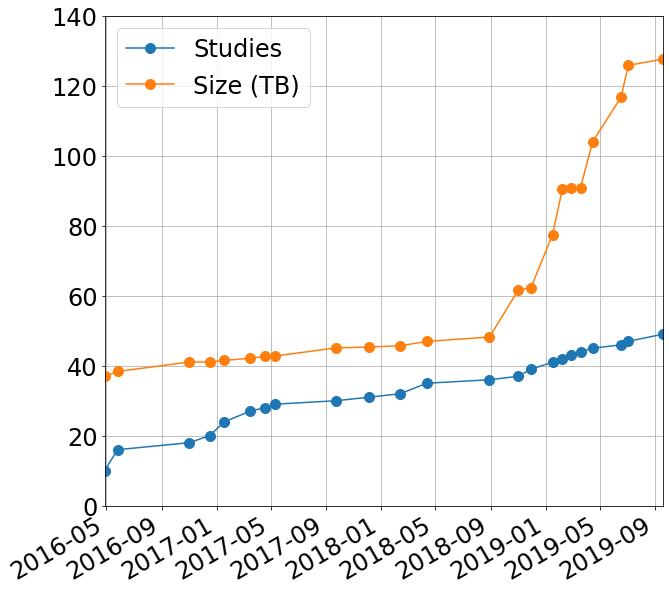

In [3]:
x = studies.join(
    releases.reset_index().set_index('Data release'),
    on='Introduced',
    how='left',
    lsuffix='l_',
    rsuffix='r_')

xy = x[['Date', 'Study', 'Size (TB)r_']]
xy = xy.assign(Studies=(x['5D Images'] > 0))
xy = xy.groupby(['Date', 'Study']).agg({'Studies': np.sum, 'Size (TB)r_': np.max})
xy['Studies'] = xy['Studies'] > 0
xy = xy.groupby(['Date']).agg({'Studies': np.sum, 'Size (TB)r_': np.max})
xy.rename(columns={'Size (TB)r_': 'Size (TB)'}, inplace=True)

# xy['Size'] = xy['Size'].cumsum() / 1e12
# xy['Size'] = xy['Size'].cumsum()
xy['Studies'] = xy['Studies'].cumsum()
p2 = xy.plot(figsize=(10, 10), grid=True, legend=True, ylim=(0, (xy['Size (TB)'].max() + 10).round(-1)), marker='o', markersize=10)
p2.set_xlabel('')
p2.set_ylabel('')
[z.set_fontsize(24) for z in p2.get_xticklabels()]
[z.set_fontsize(24) for z in p2.get_yticklabels()]
p2.legend(loc='upper left', prop={'size': 24})
p2.get_figure().savefig('idr-studies.svg', transparent=True, bbox_inches='tight')